In [2]:
import pandas as pd
df = pd.read_csv('TOPIX 過去データ.csv')
df['終値'] = df['終値'].str.replace(',', '')
df['始値'] = df['始値'].str.replace(',', '')

df['終値'] = df['終値'].astype(float)
df['始値'] = df['始値'].astype(float)

df.head()

,日付け,終値,始値,高値,安値,出来高,前日比%
0,2021年6月3日,1958.70,1942.79,"1,966.09","1,942.79",1.09B,0.84%
1,2021年6月2日,1942.33,1930.06,"1,946.67","1,916.84",1.25B,0.84%
2,2021年6月1日,1926.18,1930.74,"1,933.59","1,912.61",907.47M,0.17%
3,2021年5月31日,1922.98,1940.13,"1,944.94","1,919.78",1.02B,-1.26%
4,2021年5月28日,1947.44,1933.86,"1,949.28","1,933.86",1.36B,1.91%


In [3]:
# 6月2日~2月2日まで終値をとりだす
x= df.iloc[1:82,1]
# 6月3日~2月3日まで始値をとりだす
y =df.iloc[0:81,2]

In [4]:
x.tail()


77    1923.95
78    1890.95
79    1865.12
80    1871.09
81    1847.02
Name: 終値, dtype: float64

In [5]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

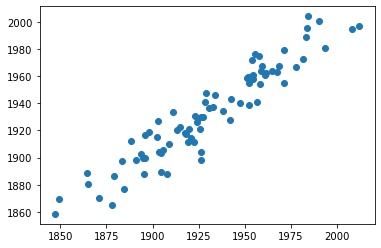

In [6]:
plt.plot(x, y, 'o')
plt.show()

In [7]:
# モデルをフィットさせる
x=x.values.reshape(-1, 1)
y=y.values.reshape(-1, 1)

model_lr = LinearRegression()
model_lr.fit(x, y)

LinearRegression()

In [8]:
print(model_lr.coef_, model_lr.intercept_)

[[0.90984049]] [176.50585519]


In [9]:
import statsmodels.api as sm

x_list=list(x)
y_list=list(y)

x_add_const = sm.add_constant(x_list)
model_sm = sm.OLS(y_list, x_add_const).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     665.7
Date:                Wed, 04 Aug 2021   Prob (F-statistic):           3.08e-40
Time:                        23:15:37   Log-Likelihood:                -311.37
No. Observations:                  81   AIC:                             626.7
Df Residuals:                      79   BIC:                             631.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        176.5059     68.082      2.593      0.0

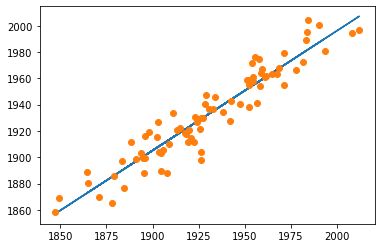

In [10]:
plt.plot(x, 0.9098*x+176.5059)
plt.plot(x, y, 'o')
plt.show()